<a href="https://colab.research.google.com/github/nishgowda/ml-sandbox/blob/master/pytorch/Linear_Regresson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

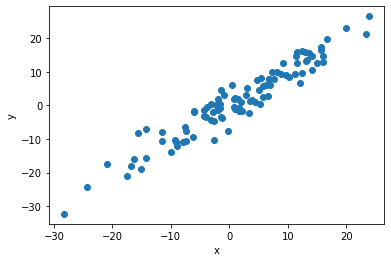

In [3]:
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [4]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [5]:
torch.manual_seed(1)
model = LR(1, 1)

In [6]:
[w, b] = model.parameters()
def get_params():
  return(w[0][0].item(), b[0].item())

In [7]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

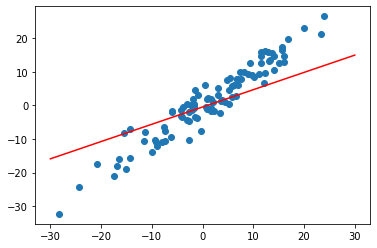

In [8]:
plot_fit("Initial Model")

In [11]:
criterion = nn.MSELoss() # Mean Squared Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001) # Stohcastic Gradient Descent
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("Epoch: ", i, "Loss :" , loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  0 Loss : 267000769150976.0
Epoch:  1 Loss : 255583252905984.0
Epoch:  2 Loss : 244654003978240.0
Epoch:  3 Loss : 234192067624960.0
Epoch:  4 Loss : 224177562845184.0
Epoch:  5 Loss : 214591279726592.0
Epoch:  6 Loss : 205414914326528.0
Epoch:  7 Loss : 196630917677056.0
Epoch:  8 Loss : 188222562893824.0
Epoch:  9 Loss : 180173777403904.0
Epoch:  10 Loss : 172469176500224.0
Epoch:  11 Loss : 165094029787136.0
Epoch:  12 Loss : 158034294734848.0
Epoch:  13 Loss : 151276398575616.0
Epoch:  14 Loss : 144807489961984.0
Epoch:  15 Loss : 138615246028800.0
Epoch:  16 Loss : 132687771729920.0
Epoch:  17 Loss : 127013775998976.0
Epoch:  18 Loss : 121582403977216.0
Epoch:  19 Loss : 116383295733760.0
Epoch:  20 Loss : 111406510768128.0
Epoch:  21 Loss : 106642544787456.0
Epoch:  22 Loss : 102082279374848.0
Epoch:  23 Loss : 97717015543808.0
Epoch:  24 Loss : 93538440183808.0
Epoch:  25 Loss : 89538550562816.0
Epoch:  26 Loss : 85709687881728.0
Epoch:  27 Loss : 82044562440192.0
Epoch: 

Text(0.5, 0, 'Epoch')

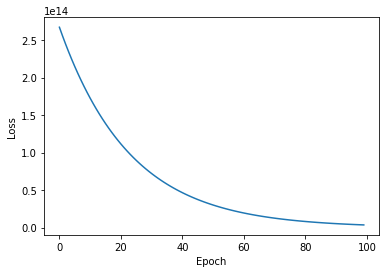

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")